In [1]:
import pandas as pd
covid_data = pd.read_csv('covid_data.csv')
vaccinations_data = pd.read_csv('country_vaccinations.csv')

vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)

covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] *100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] *100

covid_df.shape

(86785, 18)

___Seaborn___ — надстройка над библиотекой _Matplotlib_, которая значительно расширяет её возможности, позволяя создавать графики более высокого уровня с эстетичным оформлением. Библиотека предоставляет большое количество дополнительных опций для творчества при визуализации данных.

In [5]:
import seaborn as sns
print(sns.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

0.11.2


Для фильтрации по списку значений используем метод __isin()__, который проверяет, есть ли запись в столбце в переданном в метод списке. В результате возвращается привычная нам маска.

In [3]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)

croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred']=croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


***Гистограмма***
Для визуализации гистограмм в библиотеке Seaborn используется метод __histplot()__.  
- _data_ — DataFrame, по которому строится график  
- _x_ — признак, который будет отложен по оси абсцисс  
- _y_ — признак, который будет отложен по оси ординат  
- _hue_ — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории __!__(не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn)  __!__
- _ax_ — система координат Matplotlib, в которой строится график  
- _color_ — цвет графика  
- _bins_ — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул)  
- _kde_ — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False)  

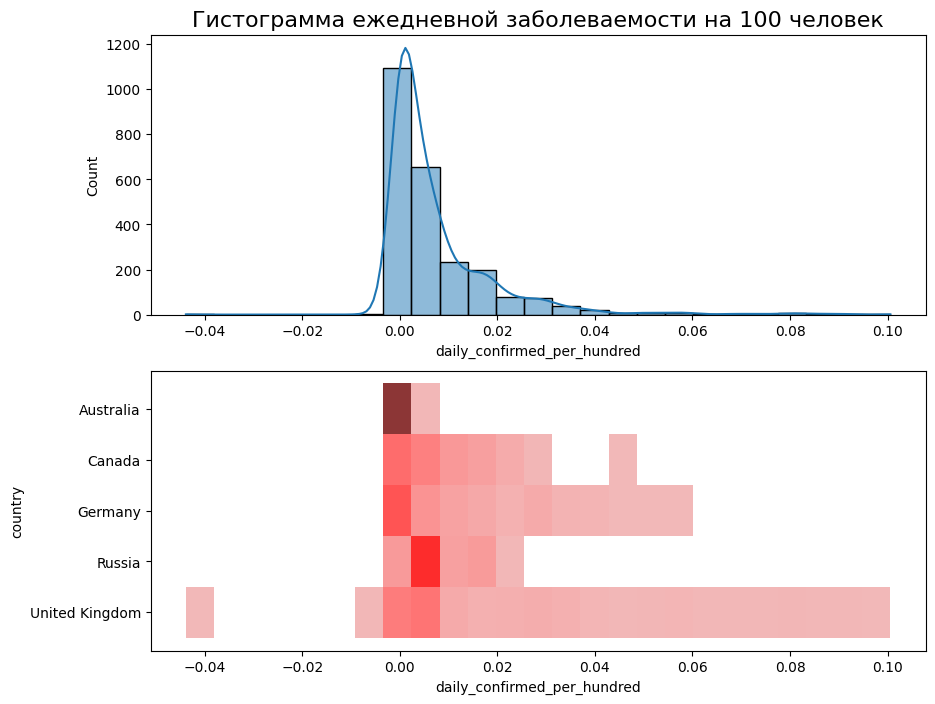

In [8]:
# строим две гистограммы:
# 1 - общее распределение ежедевной забоелваемости
# 2 - то же в разрезе стран
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)

sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

На самом деле при использовании Seaborn необязательно передавать координатные плоскости в аргументы функций. Графики в библиотеке вполне себе самодостаточны: функции для построения графика возвращают объект Axes из библиотеки Matplotlib, с которыми мы уже умеем работать. Достаточно просто занести результат выполнения функции в переменную и использовать её для настройки графика.

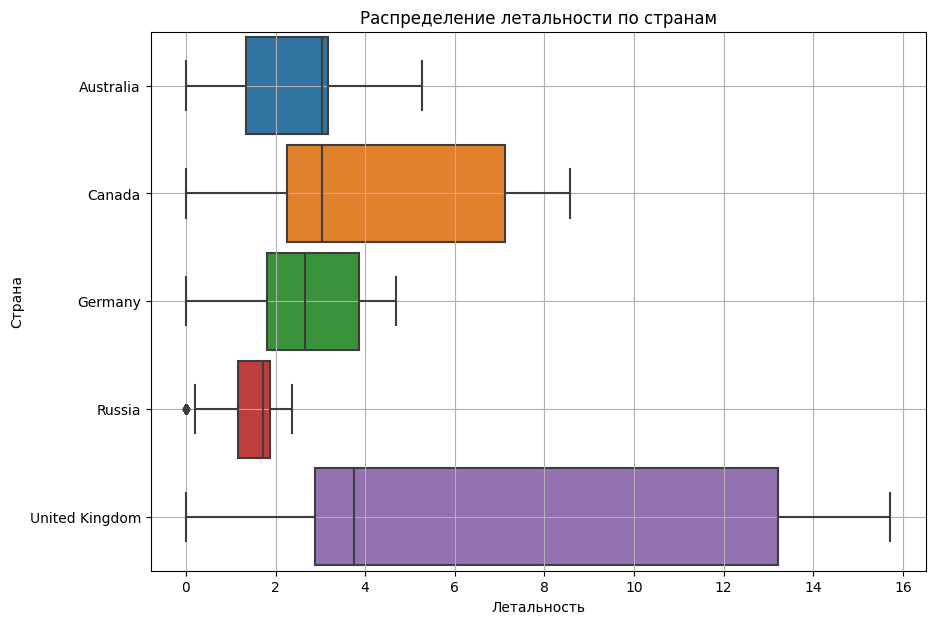

In [9]:
# коробчатая диаграмма признака летальности
fig = plt.figure(figsize=(10,7))
boxplot=sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)

boxplot.set_title('Распределение летальности по странам')
boxplot.set_xlabel('Летальность')
boxplot.set_ylabel('Страна')
boxplot.grid()

Теперь рассмотрим пример __многоуровневой столбчатой диаграммы__. С помощью неё мы можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.

Для построения столбчатых диаграмм в Seaborn используется метод __barplot()__. По умолчанию метод отображает среднее по столбцу, который указан в параметре _x_ (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задаётся в параметре _estimator_). Для добавления многоуровневости используется параметр _hue_, который позволяет группировать данные по признаку.

Text(0.5, 1.0, 'Средний процент болеющего населения по кварталам')

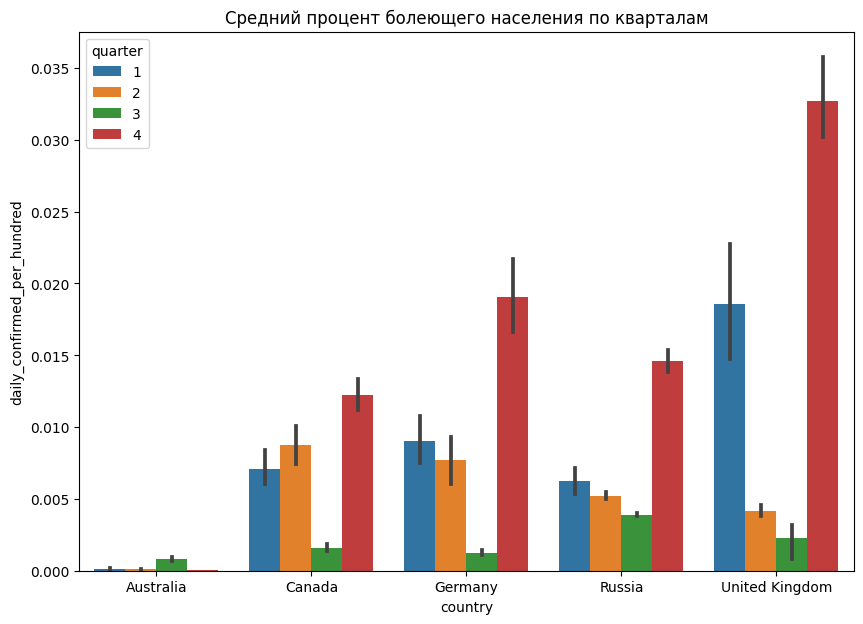

In [13]:
fig = plt.figure(figsize=(10,7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter'
)
barplot.set_title('Средний процент болеющего населения по кварталам')

Построим один из самых любимых дата-сайентистами графиков — __jointplot()__ — в котором совмещены диаграмма рассеяния и гистограмма. Это довольно удобный и полезный инструмент, когда мы хотим одновременно посмотреть и на распределения переменных, и сразу оценить их взаимосвязь.

Построим jointplot зависимости ежедневной заболеваемости в странах от общей численности населения в процентах от числа полностью вакцинированных в процентах.

Параметры _xlim_ и _ylim_ определяют диапазон отображения осей x и y. Параметр _height_ отвечает за высоту и ширину графика (он квадратный).

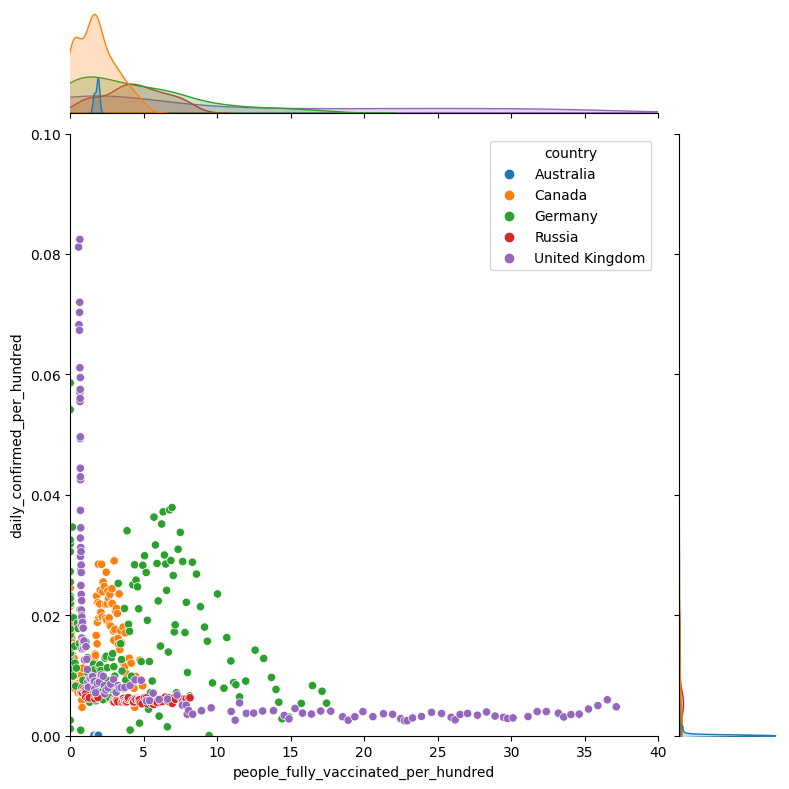

In [18]:
jointtplot = sns.jointplot(
    data=croped_covid_df,
    x='people_fully_vaccinated_per_hundred',
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim=(0,40),
    ylim=(0,0.1),
    height=8
)

Допустим, мы хотим сравнить темпы вакцинации по странам во времени. Вы, скорее всего, сразу подумали о линейном графике. Но давайте мыслить шире. Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае — по странам, а их у нас их всего пять), нагляднее всего будет __тепловая карта__.

In [21]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


Для построения тепловой карты в Seaborn используется метод __heatmap()__. Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. Параметр _annot_ отвечает за отображение легенды (аннотации), параметр _cmap_ — за цветовую гамму графика.

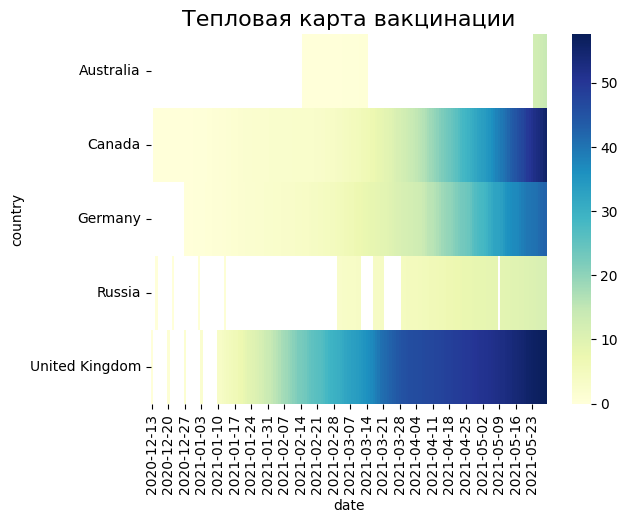

In [23]:
heatmap = sns.heatmap(
    data=pivot,
    cmap='YlGnBu'
)
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

Text(0.5, 1.0, 'Рост числа зарачившихся в процента от общего числа населения')

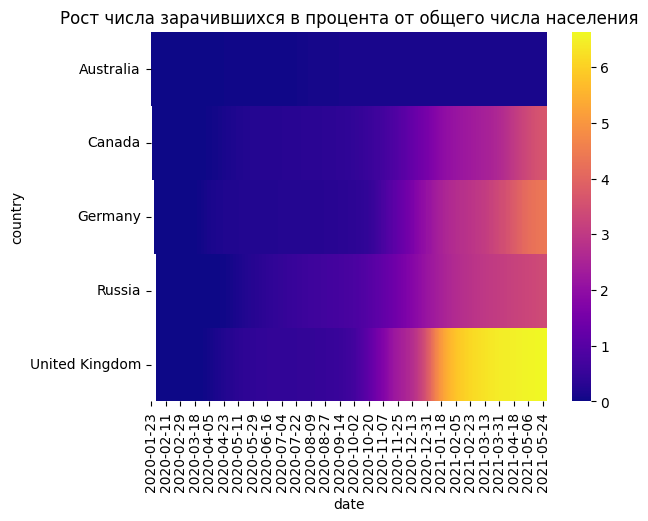

In [25]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100
new_pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    index='country',
    columns='date'
)
new_pivot.columns=new_pivot.columns.astype('string')
my_heatmap = sns.heatmap(
    data=new_pivot,
    cmap='plasma'
)
my_heatmap.set_title('Рост числа зарачившихся в процента от общего числа населения')


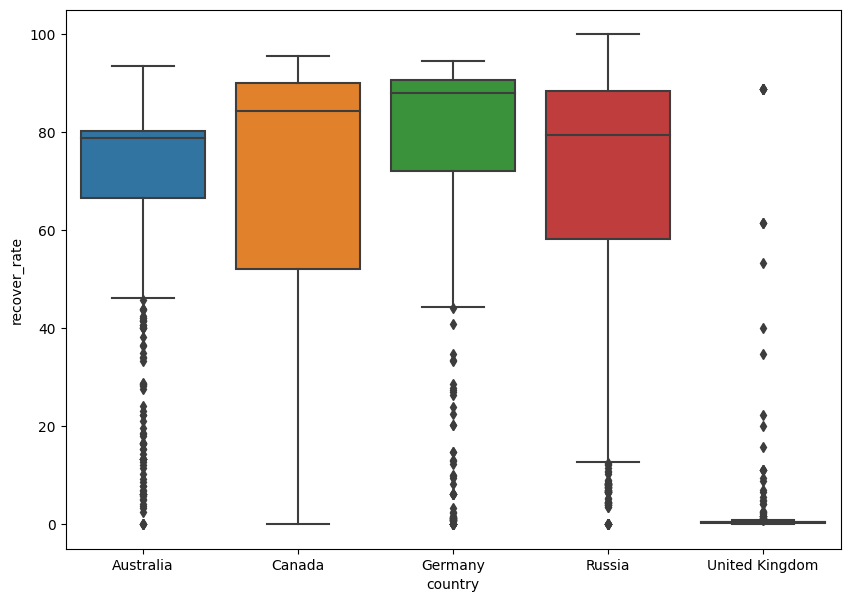

In [33]:
# 6.5
# Постройте коробчатую диаграмму для признака recover_rate
# (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).
fig = plt.figure(figsize=(10,7))
boxplot=sns.boxplot(
    data=croped_covid_df,
    x='country',
    y='recover_rate',
    orient='v',
    width=0.8
)